In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


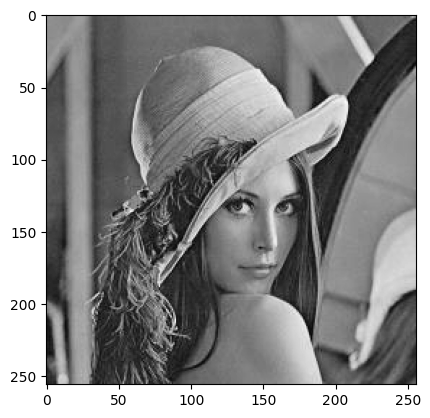

In [3]:
img = cv2.imread('/content/drive/MyDrive/colabp/Images/lena256.jpg')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [26]:

gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=int)
gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=int)

In [27]:
x=cv2.filter2D(gImg,-1,gx)
y=cv2.filter2D(gImg,-1,gy)

In [28]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg =cv2.addWeighted(absX,0.5,absY,0.5,0)

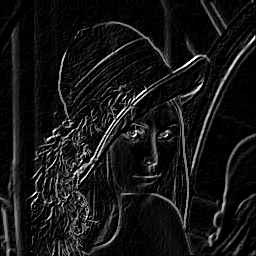

In [29]:
#outImg =outImg*5
cv2_imshow(outImg)

In [20]:
gBin =np.zeros((gImg.shape[0],gImg.shape[1]),dtype =np.ubyte)

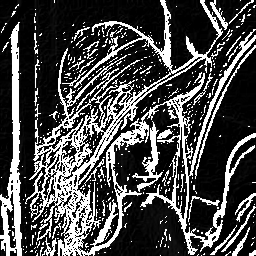

In [23]:
threshold =40

for h in range (gImg.shape[0]):
  for w in range (gImg.shape[1]):
    if (outImg[h,w]>threshold):
      outImg[h,w]=255

cv2_imshow(outImg)

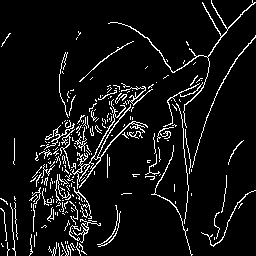

In [25]:
cannyImg=cv2.Canny(gImg,200,250)
cv2_imshow(cannyImg)

In [30]:
blurImg=cv2.GaussianBlur(gImg,(5,5),1.4)


In [34]:
x=cv2.filter2D(blurImg,-1,gx)
y=cv2.filter2D(blurImg,-1,gy)


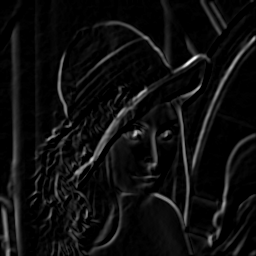

In [35]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg =cv2.addWeighted(absX,0.5,absY,0.5,0)
cv2_imshow(cannyOutImg)

In [36]:
cannyDirection=np.arctan2(y,x)